In [1]:
!pip install -r requirements.txt

     |████████████████████████████████| 9.8 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 454 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 100 kB 15.0 MB/s ta 0:00:01
     |████████████████████████████████| 303 kB 13.3 MB/s eta 0:00:01


     |████████████████████████████████| 1.4 MB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 91 kB 15.2 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 723 kB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 883 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 11.7 MB/s eta 0:00:01    |██████████████▉                 | 12.0 MB 8.2 MB/s eta 0:00:02     |██████████████████████████████  | 24.2 MB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 13.3 MB/s eta 0:00:01
     |███████████████████████████████

     |████████████████████████████████| 1.1 MB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 804.1 MB 11.4 MB/s eta 0:00:01     |██████████                      | 250.6 MB 12.1 MB/s eta 0:00:46     |██████████▏                     | 256.1 MB 14.4 MB/s eta 0:00:39     |████████████▏                   | 306.4 MB 13.4 MB/s eta 0:00:38     |████████████████▍               | 412.1 MB 13.9 MB/s eta 0:00:29     |████████████████▉               | 421.7 MB 14.3 MB/s eta 0:00:27     |█████████████████▌              | 440.2 MB 14.2 MB/s eta 0:00:26     |███████████████████▌            | 488.6 MB 14.1 MB/s eta 0:00:23     |██████████████████████████▎     | 660.5 MB 13.7 MB/s eta 0:00:11     |█████████████████████████████▏  | 734.3 MB 11.9 MB/s eta 0:00:06
     |████████████████████████████████| 74 kB 16.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 13.5 MB/s eta 0:00:01
  Created wheel for cont

In [2]:
import tensorflow as tf
print(tf.__version__)

from os import listdir
from transformers import ( 
    T5Tokenizer, 
    TFT5ForConditionalGeneration
)
import numpy as np
import time

import pickle

# import python files
import sys
sys.path.append("../..")

from python_files.language_tokens import LanguageTokens
from python_files.model_loader import ModelLoader
from python_files.tf_record_loader import TFRecordLoader


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

2.4.1


In [3]:
model_size = "t5-base"

MAX_ARTICLE_LEN = 512

MAX_HIGHLIGHT_LEN = 150

BATCH_SIZE = 8

root_folder = "../.."

result_folder = root_folder + "/results/"

In [4]:
tokenizer = T5Tokenizer.from_pretrained(model_size)
language_tokens = LanguageTokens(tokenizer, "tf")
prefix_size = language_tokens.prefix_size
language_token_order = ["de_de", "en_de", "de_en", "en_en"]

In [5]:
language_tokens.en_de_prefix

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([21603,  1566,    12,  2968,    10], dtype=int32)>

In [6]:
tf_record_loader = TFRecordLoader(root_folder, language_tokens, prefix_size, MAX_ARTICLE_LEN, MAX_HIGHLIGHT_LEN, BATCH_SIZE)

sued_test_dataset = tf_record_loader.get_tfrecord_dataset("/data/sueddeutsche_test/")
sued_test_dataset.prefetch(1024)

<PrefetchDataset shapes: ((None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150)), types: (tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32)>

In [7]:
cdm_test_dataset = tf_record_loader.get_tfrecord_dataset("/data/cnn_daily_mail_test/")
cdm_test_dataset.prefetch(1024)

<PrefetchDataset shapes: ((None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150)), types: (tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32)>

In [8]:
def get_all_language_combinations(ds):
    for i in range(1, 5):
        yield ds[(i-1)*4], ds[i*4-3], ds[i*4-2], ds[i*4-1]

In [9]:
def get_mask_weights(x):
    new_arr = []
    x_numpy = x.numpy()
    for x_i in x_numpy:
        # remove eos token 
        x_i[np.where(x_i == 1)] = 0.
        # remove pad token
        x_i[np.where(x_i == 0)] = 0.
        x_i[np.where(x_i > 0)] = 1.
        x_i = x_i.reshape(1,-1)
        new_arr.append(x_i.T@x_i)
        
    return tf.convert_to_tensor(new_arr, dtype=tf.float32)

In [10]:
def get_model_attentionlast_layer(model, input_ids, decoder_ids):
    mask = get_mask_weights(input_ids)
    outputs = model(input_ids, decoder_input_ids=decoder_ids, output_attentions=True)
    
    encoder_attention = outputs.encoder_attentions
    last_attention = encoder_attention[-1]
    
    # mean of attention heads 
    mean_last_att = tf.math.reduce_mean(last_attention, axis=[1])
    
    masked_mean = mean_last_att * mask

    masked_mean = masked_mean.numpy()
    return masked_mean

def get_model_attention(model, input_ids, decoder_ids):
    mask = get_mask_weights(input_ids)
    outputs = model(input_ids, decoder_input_ids=decoder_ids, output_attentions=True)
    
    encoder_attention = outputs.encoder_attentions
    last_attention = tf.stack(encoder_attention, axis=0)
    
    # mean of attention heads 
    mean_last_att = tf.math.reduce_mean(last_attention, axis=[2])
    masked_mean = []
    for i in range(mean_last_att.shape[0]):
        masked_mean.append(mean_last_att[i] * mask) 
    
    masked_mean = tf.stack(masked_mean, axis=0)
        
    # mean batch
    masked_mean = tf.math.reduce_mean(masked_mean, axis=[1])

    masked_mean = masked_mean.numpy()
    return masked_mean

In [11]:
def normalize(x, cut_outliers=True):
    # cut of outliers
    if cut_outliers:
        variance = np.var(x)
        mean = np.mean(x)
        x[x>(variance + mean)] = mean + variance
        x[x<(mean - variance)] = mean - variance
    # normalize
    x_res = x/np.linalg.norm(x)
    return x_res

In [12]:
def plot_heatmap(x, title):
    print(title)
    plt.figure(1,figsize=(10,10))
    cmap = "Blues"
    ax = sns.heatmap(x, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap)
    plt.show()

    
def get_heatmap_layers(mean_last_att):
#     print(mean_last_att.shape)
    heat_map = []
    x_stack = np.mean(mean_last_att, axis=0)
    for x_i in x_stack:
        x_flat = np.sum(x_i, axis=0)
        # neutralize the summarize token
        x_flat[:6] = np.mean(x_flat)
        x_flat[-1] = np.mean(x_flat)
        
        # cut outlieres
        variance = np.var(x_flat)
        mean = np.mean(x_flat)
        x_flat[x_flat>(variance + mean)] = variance + mean
        x_flat[x_flat<(mean - variance)] = mean - variance
        x_flat = x_flat.reshape(-1, 16)
        heat_map.append(x_flat)

    heat_map = np.array(heat_map)
        
    heat_map = np.mean(heat_map, axis=0)
    title = "Mean over layers" 
    return heat_map

def plot_two_heatmaps(x, y):
    fig = plt.figure(constrained_layout=True, figsize=(20, 12))
#     cmap = "Blues"
#     cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
    cmap = "Spectral"
    spec = plt.GridSpec(2, 2, figure=fig)
    f_ax1 = fig.add_subplot(spec[0, 0])
    f_ax2 = fig.add_subplot(spec[0, 1])
    ax_1 = sns.heatmap(x, ax=f_ax1, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap)
    ax_2 = sns.heatmap(y, ax=f_ax2, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap)
    plt.show()
    
def plot_three_heatmaps(x, y, z, title, use_same_scale=False):
    fig = plt.figure(constrained_layout=True, figsize=(20, 12))
#     cmap = "Blues"
#     cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
    cmap = "Spectral"
    
    spec = plt.GridSpec(2, 3, figure=fig)
    f_ax1 = fig.add_subplot(spec[0, 0])
    f_ax2 = fig.add_subplot(spec[0, 1])
    f_ax3 = fig.add_subplot(spec[0, 2])
    if use_same_scale:
        min_x = np.min(np.concatenate([x, y, z]))
        max_x = np.max(np.concatenate([x, y, z]))
        ax_1 = sns.heatmap(x, ax=f_ax1, vmin=min_x, vmax=max_x, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[0])
        ax_2 = sns.heatmap(y, ax=f_ax2, vmin=min_x, vmax=max_x, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[1])
        ax_3 = sns.heatmap(z, ax=f_ax3, vmin=min_x, vmax=max_x, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[2])
    else:
        ax_1 = sns.heatmap(x, ax=f_ax1, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[0])
        ax_2 = sns.heatmap(y, ax=f_ax2, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[1])
        ax_3 = sns.heatmap(z, ax=f_ax3, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[2])
    
    plt.show()
    
def plot_four_heatmaps(x_0, x_1, x_2, x_3, title, use_same_scale=False):
    fig = plt.figure(constrained_layout=True, figsize=(20, 12))
#     cmap = "Blues"
#     cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
 
    
    cmap = "Spectral"
    spec = plt.GridSpec(2, 2, figure=fig)
    f_ax0_0 = fig.add_subplot(spec[0, 0])
    f_ax0_1 = fig.add_subplot(spec[0, 1])
    f_ax1_0 = fig.add_subplot(spec[1, 0])
    f_ax1_1 = fig.add_subplot(spec[1, 1])
    
    if use_same_scale:
        min_x = np.min(np.concatenate([x_0, x_1, x_2, x_3]))
        max_x = np.max(np.concatenate([x_0, x_1, x_2, x_3]))
        ax_0_0 = sns.heatmap(x_0, ax=f_ax0_0, vmin=min_x, vmax=max_x, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[0])
        ax_0_1 = sns.heatmap(x_1, ax=f_ax0_1, vmin=min_x, vmax=max_x, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[1])
        ax_1_0 = sns.heatmap(x_2, ax=f_ax1_0, vmin=min_x, vmax=max_x, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[2])
        ax_1_1 = sns.heatmap(x_3, ax=f_ax1_1, vmin=min_x, vmax=max_x, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[3])
    else:
        ax_0_0 = sns.heatmap(x_0, ax=f_ax0_0, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[0])
        ax_0_1 = sns.heatmap(x_1, ax=f_ax0_1, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[1])
        ax_1_0 = sns.heatmap(x_2, ax=f_ax1_0, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[2])
        ax_1_1 = sns.heatmap(x_3, ax=f_ax1_1, yticklabels=["{} - {}".format(i*16, (i+1)*16) for i in range(32)], cmap = cmap).set_title(title[3])
    
    plt.show()

In [13]:
def get_single_example(text):
    input_ids = tokenizer([text], return_tensors="tf", max_length=512, truncation=True, padding='max_length').input_ids  
    decoder_ids = decoder_ids = tokenizer([""], return_tensors="tf", max_length=150, truncation=True, padding='max_length').input_ids
    x = get_model_attention(model, input_ids, decoder_ids)
    
    heat_map = []

    for x_i in x:
        x_flat = np.sum(x_i, axis=0)
        x_filled = normalize(x_flat)
#         x_filled = x_flat
        
        x_filled = x_filled.reshape(-1, 16)
        heat_map.append(x_filled)

    heat_map = np.array(heat_map)
    heat_map = np.mean(heat_map, axis=0)
    return heat_map, input_ids

def get_threshold(heat_map_weights, percentage=0.15):
    heat_map_weights_temp = np.array(heat_map_weights, copy=True)
    heat_map_weights_temp = np.trim_zeros(heat_map_weights_temp, 'b')
    threshold_size = int(heat_map_weights_temp.shape[0]*percentage)
    heat_map_weights_temp.sort()
    threshold = heat_map_weights_temp[heat_map_weights_temp.shape[0] - threshold_size]  
    return threshold
    


def get_most_attended_word(heatmap, input_ids):
    all_max_tokens = []
    heat_map_weights = heat_map.reshape(-1)
    threshold = get_threshold(heat_map_weights)
    for i, item in enumerate(heat_map_weights):
        if item > threshold:
            all_max_tokens.append(i)


    token_ids = [input_ids[0,i].numpy() for i in all_max_tokens]
    highlight_tokens = tokenizer.decode(token_ids)
    
    result_str = ""
    for i, item in enumerate(input_ids[0]):
        str_item = tokenizer.decode(item)
        if i in all_max_tokens:
            str_item = "\\textcolor{red}{" + str_item + "}"
        if str_item not in ['</s>','<pad>']:
            if str_item == ".":
                result_str = result_str[:-1]
            elif str_item == "#":
                str_item = "\#"
            result_str += str_item + " "
    print(result_str)

In [14]:
def get_mean_weights_att(ds, model_name, epoch=9):
    model_loader = ModelLoader(model_size, root_folder+"/models", model_name) 
    model = model_loader.load_epoch(epoch)
    
    mean_weigths = []

    for i, ds_item in enumerate(ds):
        for j, (input_ids, input_mask, y, y_ids) in enumerate(get_all_language_combinations(ds_item)):
            mean_last_att = get_model_attention(model, input_ids, y_ids)

            mean_weigths.append(mean_last_att)

        if i > 100:
            break
    return np.array(mean_weigths)

In [15]:
mean_sued_seud = get_mean_weights_att(sued_test_dataset, "t5_sueddeutsche")

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [16]:
sued_sued = get_heatmap_layers(mean_sued_seud)

In [17]:
mean_sued_cdm = get_mean_weights_att(sued_test_dataset, "t5_cnn_daily_mail")

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [18]:
sued_cdm = get_heatmap_layers(mean_sued_cdm)

# Test Plus Translation models

In [19]:
mean_sued_cdm_plus_t = get_mean_weights_att(sued_test_dataset, "t5_cnn_daily_mail_plus_translation", epoch=14)

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [20]:
sued_cdm_plus_t = get_heatmap_layers(mean_sued_cdm_plus_t)

In [21]:
mean_sued_sued_plus_t = get_mean_weights_att(sued_test_dataset, "t5_sueddeutsche_plus_translation", epoch=11)

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [22]:
sued_sued_plus_t = get_heatmap_layers(mean_sued_sued_plus_t)

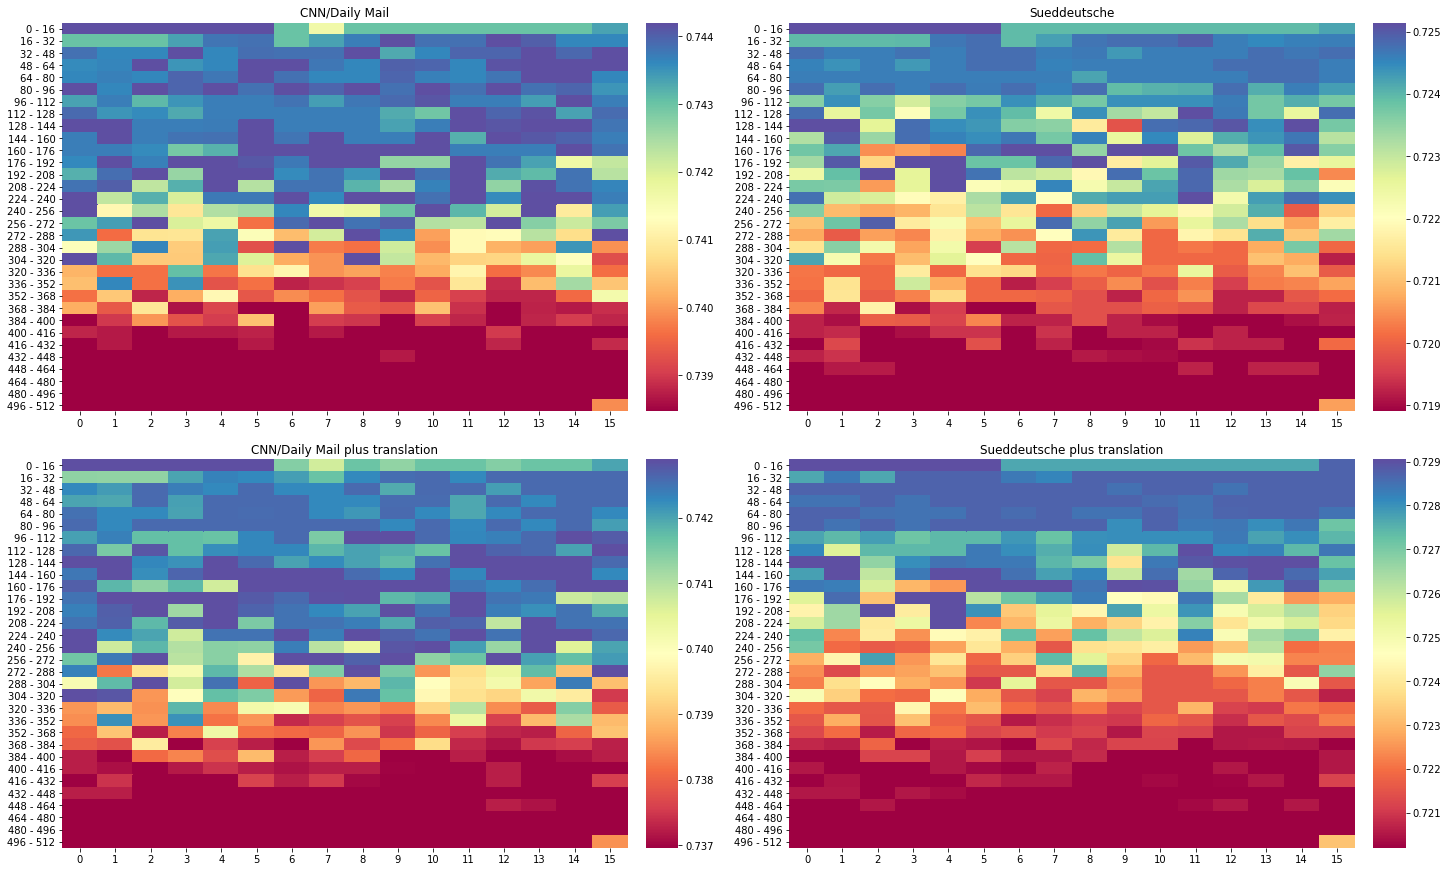

In [23]:
plot_four_heatmaps(sued_cdm, sued_sued, sued_cdm_plus_t, sued_sued_plus_t, ["CNN/Daily Mail", "Sueddeutsche", "CNN/Daily Mail plus translation", "Sueddeutsche plus translation"])

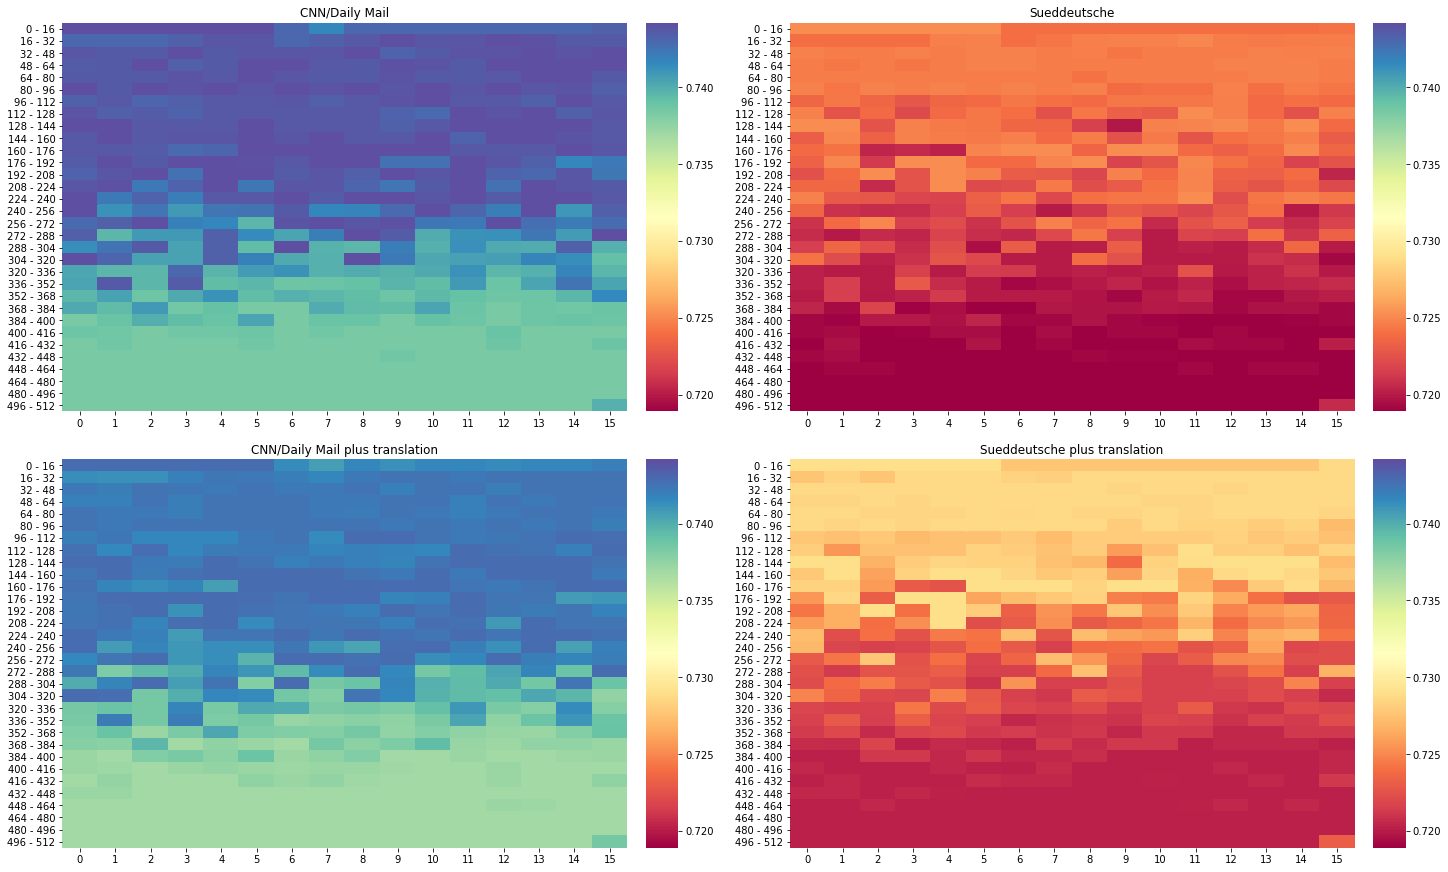

In [24]:
plot_four_heatmaps(sued_cdm, sued_sued, sued_cdm_plus_t, sued_sued_plus_t, ["CNN/Daily Mail", "Sueddeutsche", "CNN/Daily Mail plus translation", "Sueddeutsche plus translation"], True)

## Test SUM Model

In [25]:
mean_sued_sum = get_mean_weights_att(sued_test_dataset, "t5_sum", epoch=10)

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [26]:
sued_sum = get_heatmap_layers(mean_sued_sum)

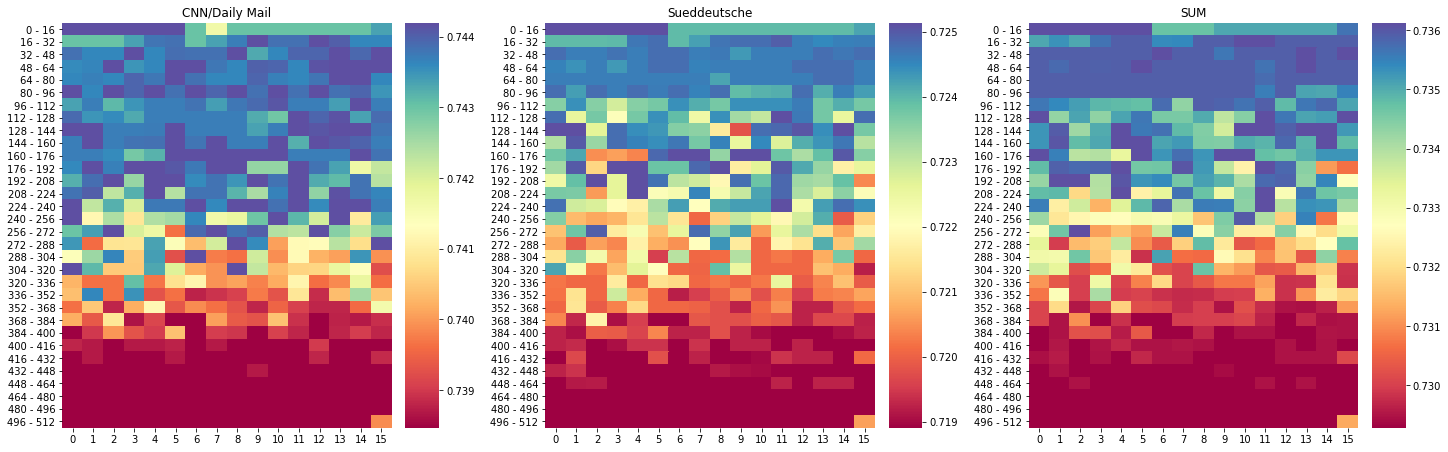

In [27]:
plot_three_heatmaps(sued_cdm, sued_sued, sued_sum, ["CNN/Daily Mail", "Sueddeutsche", "SUM"])

In [28]:
mean_cdm_sum = get_mean_weights_att(cdm_test_dataset, "t5_sum", epoch=10)

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [29]:
cdm_sum = get_heatmap_layers(mean_sued_sum)

In [30]:
mean_cdm_cdm = get_mean_weights_att(cdm_test_dataset, "t5_cnn_daily_mail", epoch=11)

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [31]:
cdm_cdm = get_heatmap_layers(mean_cdm_cdm)

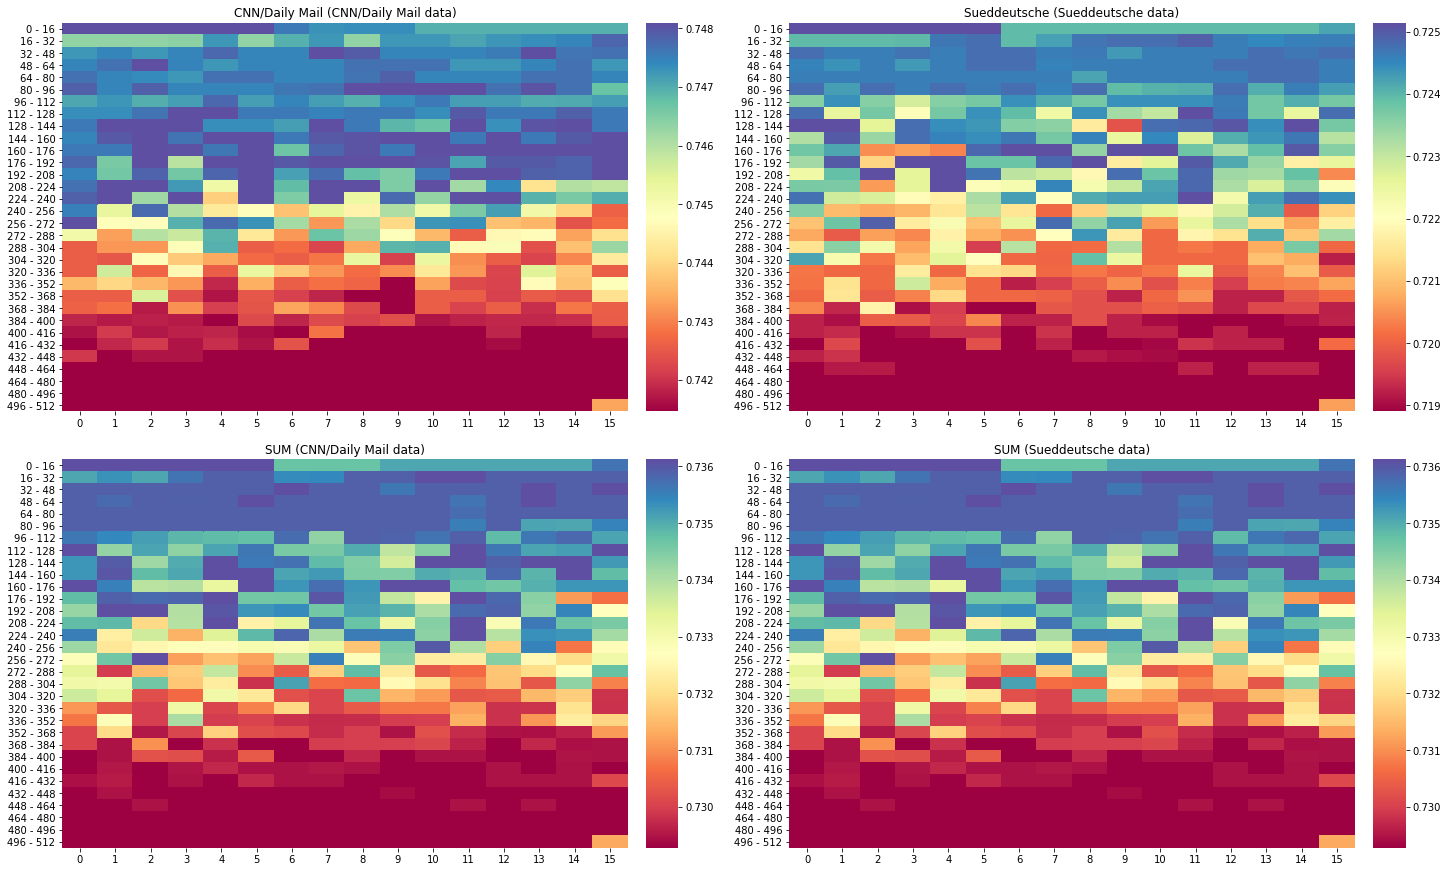

In [32]:
plot_four_heatmaps(cdm_cdm, sued_sued, cdm_sum, sued_sum, ["CNN/Daily Mail (CNN/Daily Mail data)", "Sueddeutsche (Sueddeutsche data)", "SUM (CNN/Daily Mail data)", "SUM (Sueddeutsche data)"])

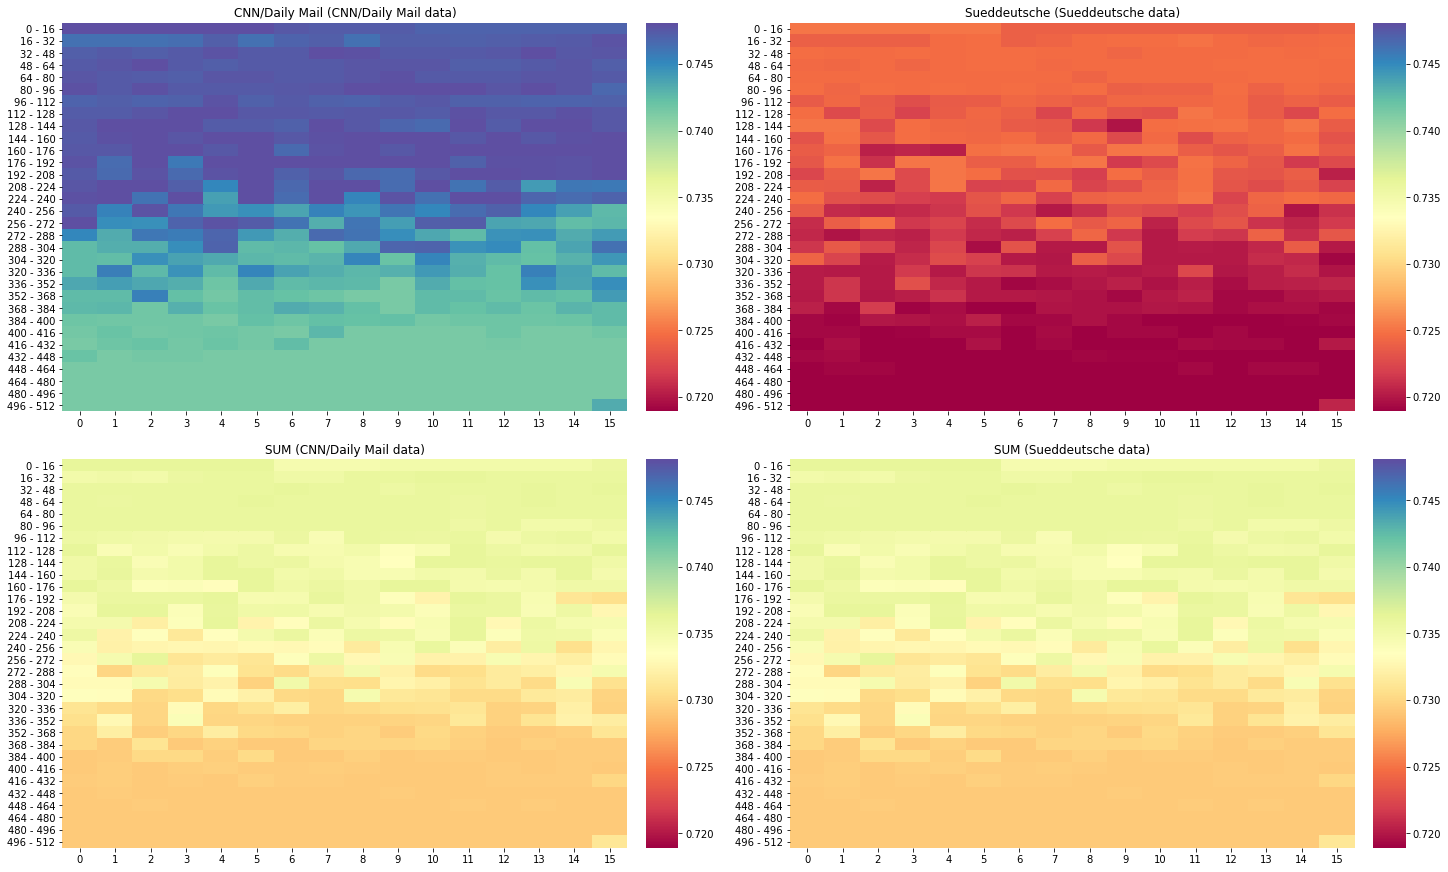

In [33]:
plot_four_heatmaps(cdm_cdm, sued_sued, cdm_sum, sued_sum, ["CNN/Daily Mail (CNN/Daily Mail data)", "Sueddeutsche (Sueddeutsche data)", "SUM (CNN/Daily Mail data)", "SUM (Sueddeutsche data)"], True)

## Test switching the first fivce sentences to the back

In [34]:
tf_record_loader = TFRecordLoader(root_folder, language_tokens, prefix_size, MAX_ARTICLE_LEN, MAX_HIGHLIGHT_LEN, BATCH_SIZE)

switch_test_dataset = tf_record_loader.get_tfrecord_dataset("/data/sueddeutsche_test_switch/")
switch_test_dataset.prefetch(1024)

<PrefetchDataset shapes: ((None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150)), types: (tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32)>

In [35]:
mean_sued_sued_switch = get_mean_weights_att(switch_test_dataset, "t5_sueddeutsche")

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [36]:
sued_sued_switch = get_heatmap_layers(mean_sued_sued_switch)

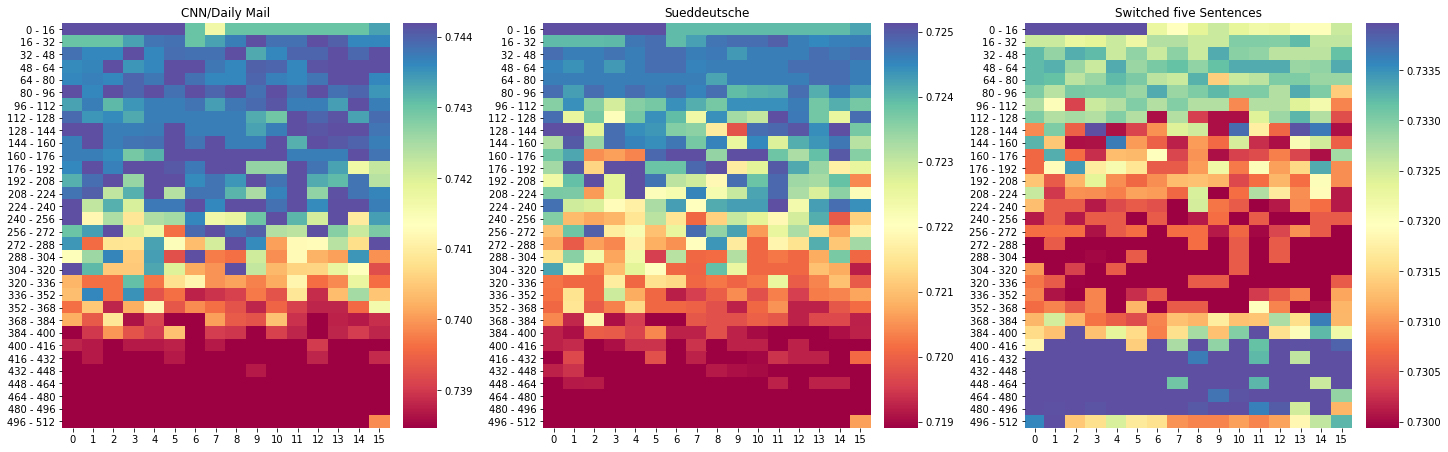

In [37]:
plot_three_heatmaps(sued_cdm, sued_sued, sued_sued_switch, ["CNN/Daily Mail", "Sueddeutsche", "Switched five Sentences"])

In [38]:
mean_sued_cdm_switch = get_mean_weights_att(switch_test_dataset, "t5_cnn_daily_mail")

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [39]:
sued_cdm_switch = get_heatmap_layers(mean_sued_cdm_switch)

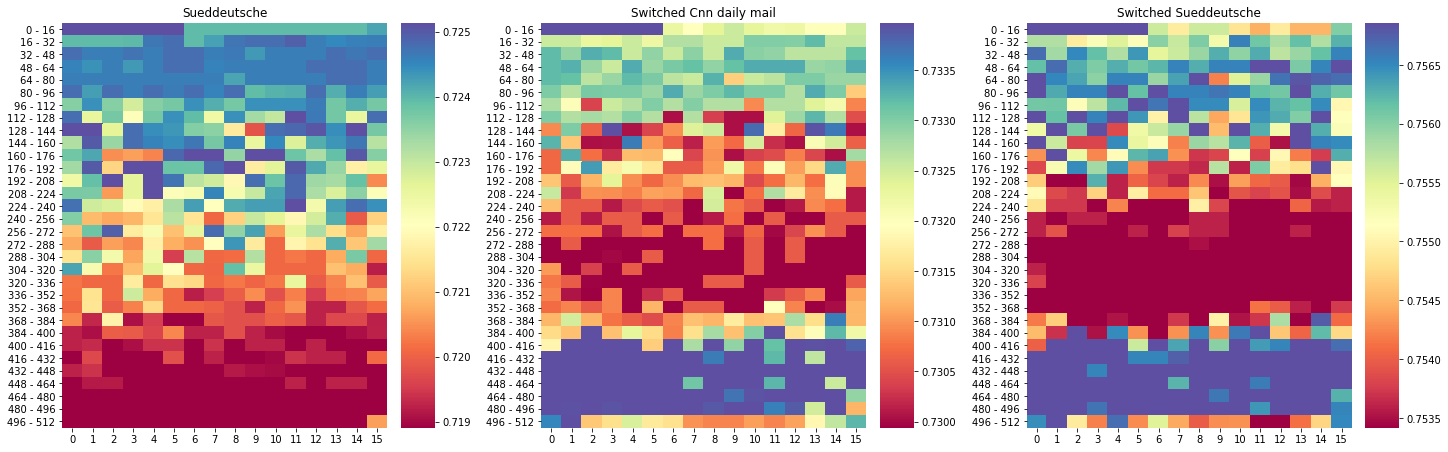

In [40]:
plot_three_heatmaps(sued_sued, sued_sued_switch, sued_cdm_switch, ["Sueddeutsche", "Switched Cnn daily mail", "Switched Sueddeutsche"])

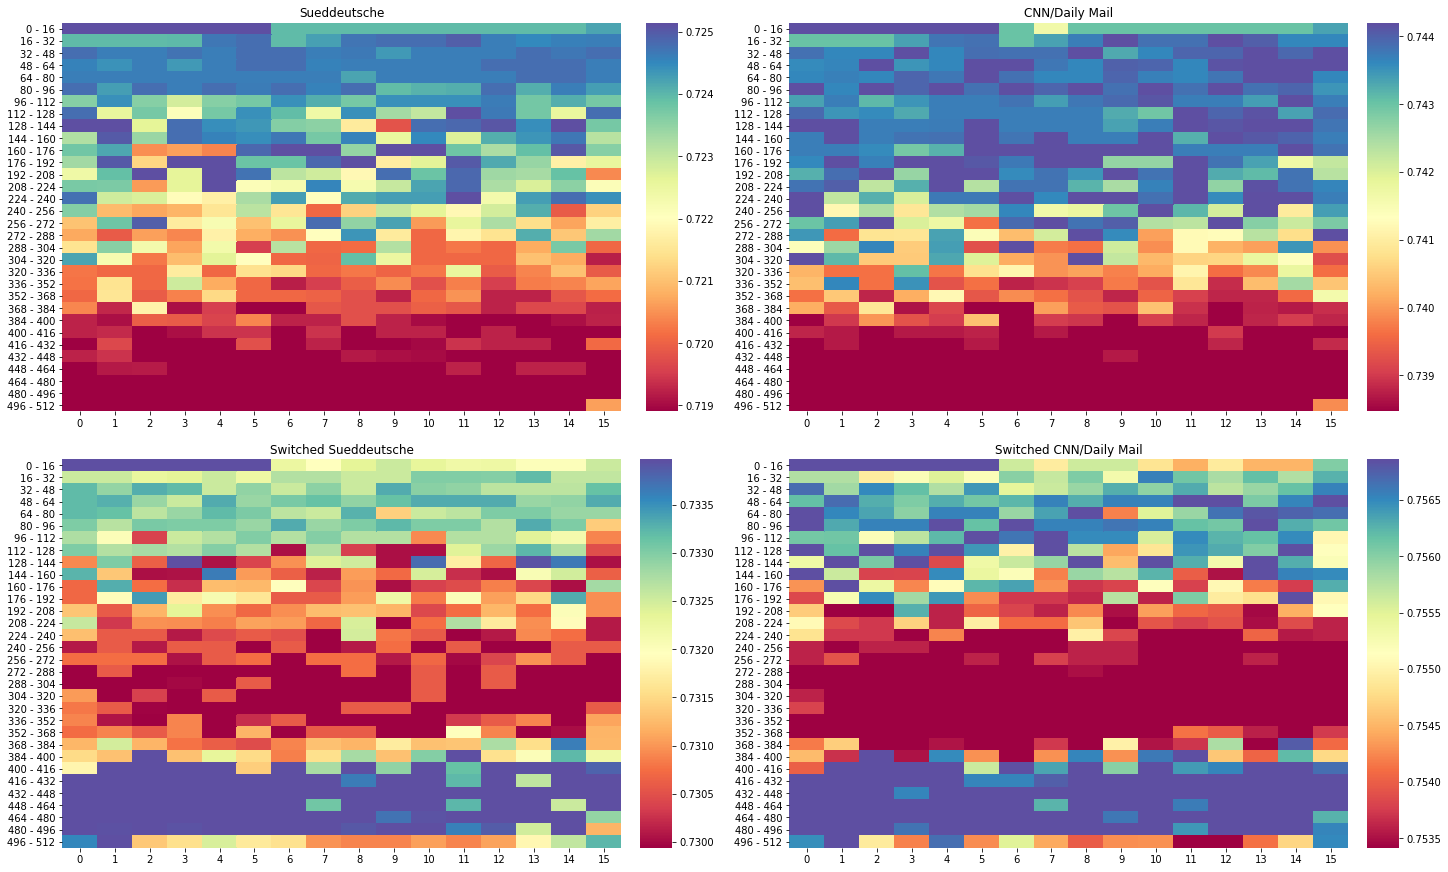

In [41]:
plot_four_heatmaps(sued_sued, sued_cdm, sued_sued_switch, sued_cdm_switch, ["Sueddeutsche", "CNN/Daily Mail", "Switched Sueddeutsche", "Switched CNN/Daily Mail"])